# Plots for Texas Senate Maps

In [1]:
# low-level libraries
import os
import csv
from functools import partial
import importlib

# dealing with data
import numpy as np
import pandas as pd
#import geopandas as gpd

# plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# make things look pretty
mpl.rcParams['font.size'] = 10
%config InlineBackend.figure_format = 'retina'

# GerryChain
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election, metrics)
from gerrychain.proposals import recom
from gerrychain.metrics import efficiency_gap, mean_median

# SMU Gerrychain Wrapper
import GerryWrap as gw


In [2]:
# Load the ensemble
esrc  = "2020-US-senate"
#ename = "TXSN/ensemble/GerryChain35K/votes_SEN20_Final.csv"
ename = "TXSN/ensembles/GerryChain500K/votes_SEN20_Final.csv"
ensembles = np.loadtxt(ename, delimiter=',')
for ee in ensembles:
    ee = ee.sort()


# load the current plan
#mstring = "Texas Senate Plan 2101"
#mstr  = "TXSN-PLAN-2100"
#mdir  = "TXSN/PLANS2100/"
#mfile = "votes_SEN20_vector_Final.csv"
#mapresult = np.loadtxt(mdir + mfile, delimiter=',')


# load the proposed map
mstring = "Texas Senate Plan 2101"
mstr  = "TXSN-PLAN-2101"
mdir  = "TXSN/TXSN_PLANS2101/"
mfile = "votes_SEN20_vector_Final.csv"
mapresult = np.loadtxt(mdir + mfile, delimiter=',')

    
# define and report
chainlength, districts = np.shape(ensembles)
print(districts, "districts")
print(chainlength, "RECOM steps")

31 districts
500000 RECOM steps


# Seats/Votes:  Varying Maps

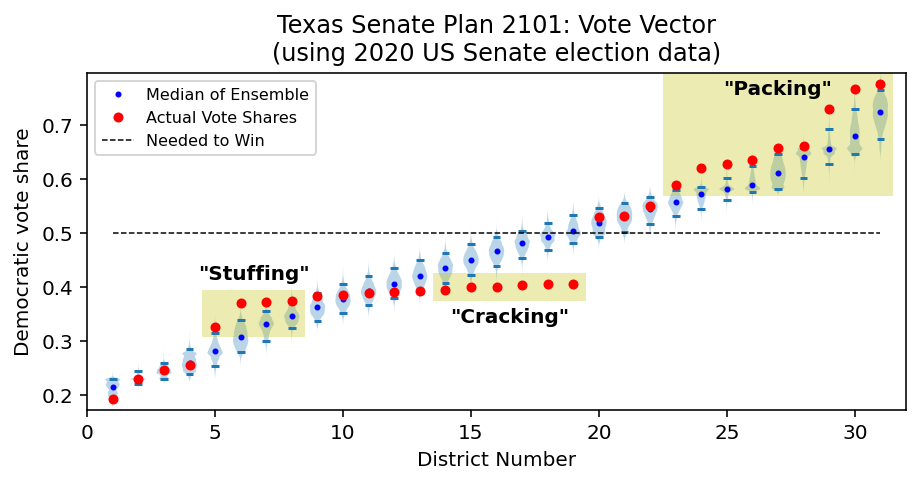

In [3]:
importlib.reload(gw)
plot_title = mstring + ': Vote Vector\n(using 2020 US Senate election data)'
myplot = gw.vote_vector_ensemble(ensembles, mapresult, plot_title, pc_thresh=.05)
myplot.savefig(mdir + mstring + '-votevector-' + esrc + '.png')
plt.show()

# Seats/Votes:  Voteshare needed for a given number of seats

Vote Needed for Majority (D-R) -- Ensemble:   -0.0146
Seats at 50% Voteshare   (D-R) -- Ensemble:        0
Vote Needed for Majority (D-R) -- Actual:     0.1283
Seats at 50% Voteshare   (D-R) -- Actual:          6


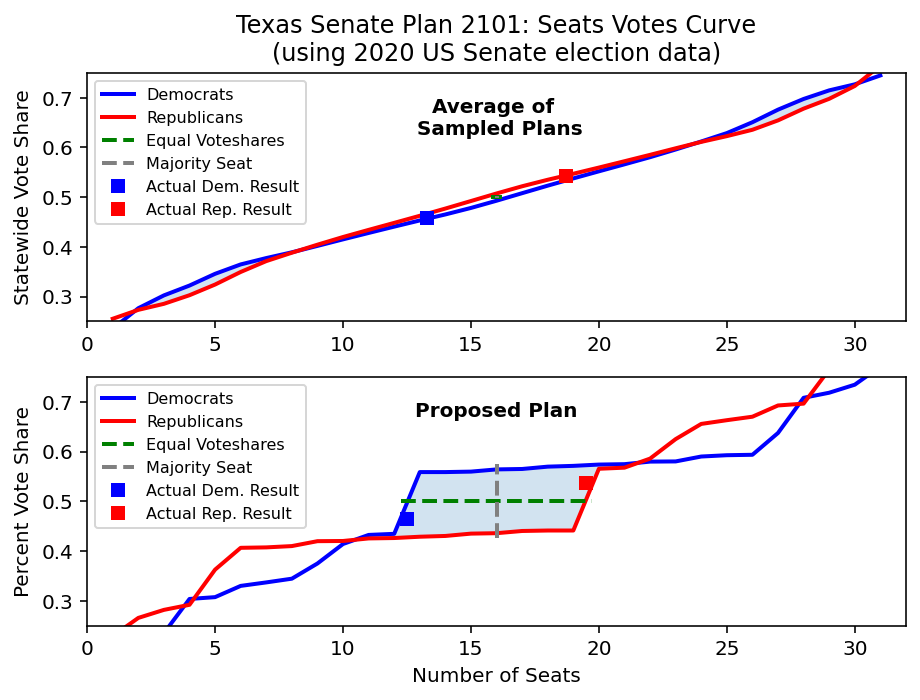

In [4]:
importlib.reload(gw)
plot_title = mstring + ': Seats Votes Curve\n(using 2020 US Senate election data)'
myplot = gw.seats_votes_ensemble(ensembles, mapresult, plot_title)
myplot.savefig(mdir + mstring + '-seatsvotes-' + esrc + '.png')
plt.show()

# Votes/Seats:  Seats received for a given voteshare (experimental)

Vote Needed for Majority (D-R) -- Ensemble:   -0.0141
Seats at 50% Voteshare   (D-R) -- Ensemble:        0
Vote Needed for Majority (D-R) -- Actual:     0.1283
Seats at 50% Voteshare   (D-R) -- Actual:          6


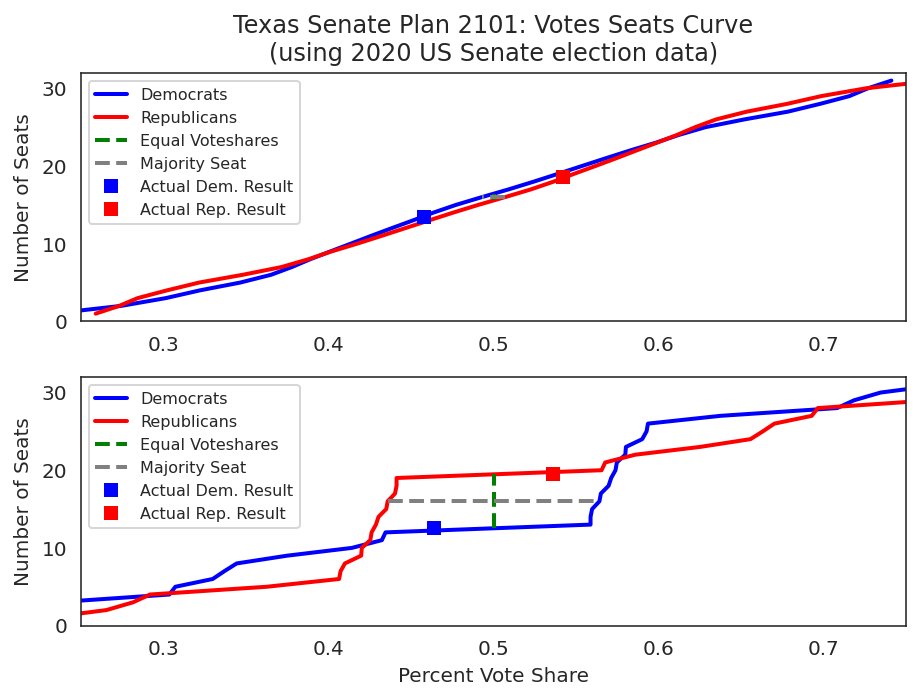

In [11]:
importlib.reload(gw)
plot_title = mstring + ': Votes Seats Curve\n(using 2020 US Senate election data)'
myplot = gw.votes_seats_ensemble(ensembles[-100000:,:], mapresult, plot_title)
myplot.savefig(mdir + mstring + '-votesseats-' + esrc + '.png')
plt.show()

# Mean/Median and Partisan Bias

MM Enacted Plan Percentile = 99.996800
PB Enacted Plan Percentile = 0.001600


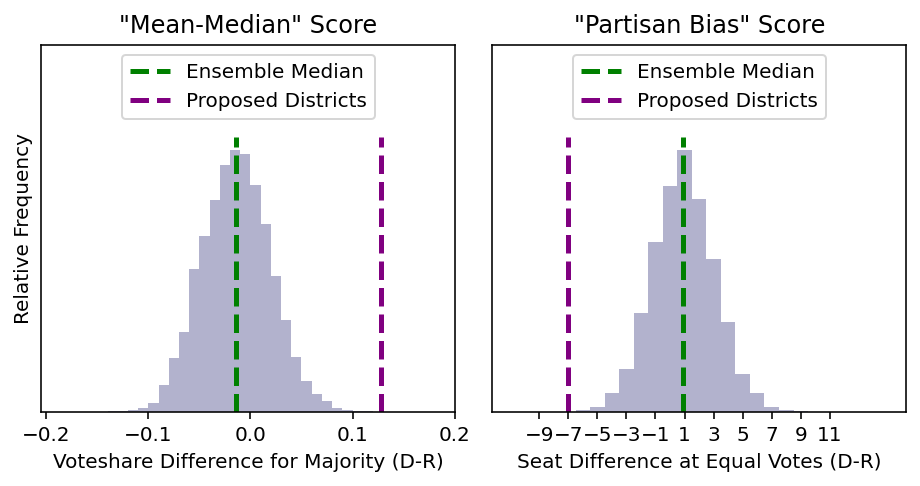

In [5]:
importlib.reload(gw)
#plot_title = mstring + ': Partisan Metrics\n(using 2020 US Senate election data)'
myplot = gw.partisan_metrics_histpair(ensembles, mapresult)
myplot.savefig(mdir + mstring + '-partisanmetrics-pair-' + esrc + '.png')
plt.show()

MM Enacted Plan Percentile = 99.985000
PB Enacted Plan Percentile = 0.000000


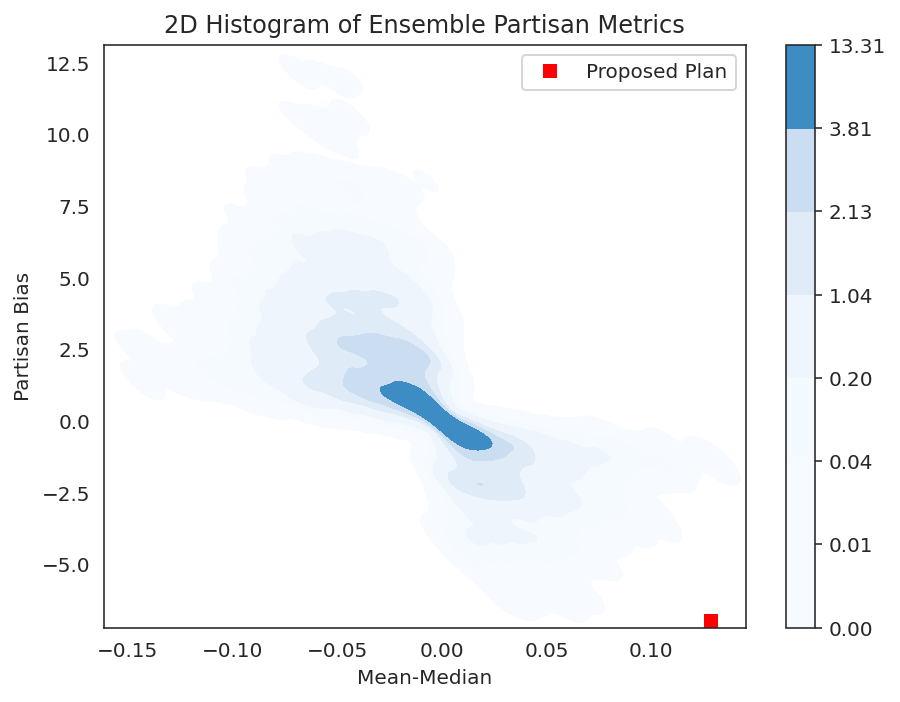

In [12]:
importlib.reload(gw)
#plot_title = mstring + ': Partisan Metrics\n(using 2020 US Senate election data)'
myplot = gw.partisan_metrics_hist2D(ensembles[-100000:,:], mapresult)
myplot.savefig(mdir + mstring + '-partisanmetrics-2D-' + esrc + '.png')
plt.show()